# Estadística inferencial: Ajuste de Modelos

La inferencia busca extraer **conclusiones** a partir de **hechos u observaciones** a través de un **método o premisa**

En el caso particular de la **inferencia estadística** podemos realizar las siguientes asociaciones

- Hechos: Datos
- Premisa: Modelo probabilístico
- Conclusión: Una cantidad no observada que es interesante

Y lo que buscamos es

> Cuantificar la incerteza de la conclusión dado los datos y el modelo 

**Niveles de la estadística inferencial**

La inferencia estadística puede dividirse en los siguientes tres niveles

1. Ajustar un modelo a nuestros datos
1. Verificar que el modelo sea confiable
1. Responder una pregunta usando el modelo

En lo que sigue estudiaremos las herramientas más utilizadas asociadas a cada uno de estos niveles

1. **Estimador de máxima verosimilitud**
1. **Bondad de ajuste** e **Intervalos de confianza**
1. **Test de hipótesis**

## Estimación de máxima verosimilitud

En este nivel de inferencia se busca **ajustar** un modelo teórico sobre nuestros datos. Nos enfocaremos en **modelos de tipo parámetrico**, es decir aquellos donde **se explicita una distribución de probabilidad** 

Ajustar un modelo que se distribuye $\mathcal{N}(\mu, \sigma^2)$ a nuestros datos corresponde a 

> encontrar los valores de $\mu$ y $\sigma$ tal que el modelo "se parezca" lo más posible a la distribución empírica de los datos

A continuación definiremos estas nociones


**¿Qué distribución ajustar?**

Antes de ajustar debemos suponer una distribución. En general podemos ajustar cualquier distribución pero un mal supuesto podría invalidar nuestra inferencia

:::{hint}

Podemos usar las herramientas de **estadística descriptiva** para estudiar nuestros datos y tomar esta decisión de manera informada

:::

**¿Cómo ajustar mi modelo?**

A continuación describiremos un procedimiento para ajustar modelos paramétricos llamado *maximum likelihood estimation* (MLE)

Sea un conjunto de datos $\{x_1, x_2, \ldots, x_N\}$. Antes de empezar haremos dos supuestos

- **Supuesto 1:** Los datos siguen el modelo $f(x;\theta)$ donde $f(\cdot)$ es una distribución y $\theta$ son sus parámetros
- **Supuesto 2:** Las datos son independientes e idénticamente distribuidos (iid)


Usando estos supuestos podemos desarrolar la distribución conjunta de los datos como como

$$
\begin{split}
f(x_1, x_2, \ldots, x_N |\theta) &= f(x_1|\theta) f(x_2|\theta) \ldots f(x_N|\theta)  \\
& = \prod_{i=1}^N f(x_i|\theta)  \\
& = \mathcal{L}(\theta)
\end{split}
$$

donde $\mathcal{L}(\theta)$ se conoce como la **verosimilitud** o probabilidad inversa de $\theta$ 


Si consideramos que los datos son fijos podemos buscar el valor de $\theta$ de máxima verosimilitud como

$$
\begin{align}
\hat \theta &= \text{arg} \max_\theta \mathcal{L}(\theta) \nonumber \\
&= \text{arg} \max_\theta \log \mathcal{L}(\theta) \nonumber \\
&= \text{arg} \max_\theta \sum_{i=1}^N \log f(x_i|\theta) 
\end{align}
$$

:::{note}

El segundo paso es valido por que el argumento máximo de $g(x)$ y $\log(g(x))$ son equivalentes (el logaritmo es monoticamente creciente)

:::

Ahora sólo falta encontrar el máximo. Podemos hacerlo

- Analíticamente, derivando con respecto a $\theta$ e igualando a cero
- Usando técnicas de optimización iterativas como gradiente descedente

**Ejemplo analítico:** 

Su profesor quiere medir su peso pero sospecha que su pesa está defectuosa. Para comprobarlo mide su peso $N$ veces obteniendo un conjunto de observaciones $\{z_i\}$. ¿Es posible obtener un estimador del peso real $\hat z$ a partir de estas observaciones?

Podemos modelar las observaciones como

$$
z_i = \hat z + \varepsilon_i
$$

donde $\varepsilon_i$ corresponde al ruido o error del instrumento y asumiremos que $\varepsilon_i \sim \mathcal{N}(0, \sigma_\varepsilon^2)$, es decir que el ruido es **independiente** y **Gaussiano** con media cero y **varianza** $\sigma_\varepsilon^2$ **conocida**

Entonces la distribución de $z_i$ es

$$
f(z_i|\hat z) = \mathcal{N}(\hat z, \sigma_\varepsilon^2)
$$

Para encontrar $\hat z$, primero escribimos el logaritmo de la **verosimilitud**

$$
\begin{align}
\log \mathcal{L}(\hat z) &=  \sum_{i=1}^N \log f(z_i|\hat z) \nonumber \\
&= \sum_{i=1}^N  \log \frac{1}{\sqrt{2\pi\sigma_\varepsilon^2}}  \exp \left ( - \frac{1}{2\sigma_\varepsilon^2} (z_i - \hat z)^2 \right)  \nonumber \\
&= -\frac{N}{2}\log(2\pi\sigma_\varepsilon^2)  - \frac{1}{2\sigma_\varepsilon^2}  \sum_{i=1}^N  (z_i - \hat z)^2  \nonumber
\end{align}
$$

Luego debemos resolver

$$
\begin{align}
\hat \theta &= \text{arg} \max_\theta \log \mathcal{L}(\theta) \nonumber \\
&= \text{arg} \max_\theta - \frac{1}{2\sigma_\varepsilon^2}  \sum_{i=1}^N  (z_i - \hat z)^2
\end{align}
$$

donde podemos ignorar el primer término de la verosimilitud ya que no depende de $\theta$

Para encontrar el máximo derivamos la expresión anterior e igualamos a cero 

$$
-\frac{1}{2\sigma_\varepsilon^2} \sum_{i=1}^N 2(z_i - \hat z) = 0.
$$

Finalmente si despejamos llegamos a que

$$
\hat z = \frac{1}{N} \sum_{i=1}^N z_i,
$$

que se conoce como el estimador de máxima verosimilitud **para la media de una Gaussiana**

:::{note}

Podemos comprobar que es un máximo utilizando la segunda derivada

:::

A continuación veremos como hacer ajuste de parámetros con MLE para distintas distribuciones conocidas utilizando `scipy`

## Estimación MLE con `scipy`

El módulo [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html) provee de un gran número de distribuciones teóricas. Los objetos de tipo distribución comparten algunos métodos, entre ellos:

- `pdf`/`pmf(x)`: Retorna la función de densidad/masa de probabilidad evaluada en $x$
- `cdf(x)`: Retorna la función de densidad/masa acumulada evaluada en $x$
- `ppf(p)`: Retorna  el inverso de la distribución acumulada
- `rvs(size=N)`: Retorna $N$ muestras a partir de la distribución
- `fit(data)`: Retorna los parámetros de la distribución ajutados al arreglo `data`

:::{important}

El método `fit` realiza estimación de máxima verosimilitud para obtener los parámetros

:::

:::{note}

El método `fit` sólo está disponible para distribuciones univariadas (continuas o discretas)

:::

Para ejemplificar el uso de `fit` utilizaremos los siguientes datos

In [1]:
import pickle
import numpy as np
import scipy.stats

with open("data/mistery_data.pkl", "rb") as f:
    mistery_data = pickle.load(f)

> Para ajustar un modelo parámetrico a estos datos primero creamos un objeto distribución y luego llamamos su método `fit`

Por ejemplo si ajustamos una distribución normal a `mistery_data` obtenemos:

In [2]:
normal_params = scipy.stats.norm.fit(mistery_data)
normal_params

(1.7598526388767328, 0.5437958926009934)

El resultado son los estimadores de máxima verosimilitud de la media y la desviación estándar de la distribución normal

Podemos visualizar el resultado del modelo ajustado utilizando `pdf`, sobre una objeto distribución creado a partir de los parámetros obtenidos

Observemos el resultado en conjunto a un histograma de `mistery_data`

In [3]:
fitted_distribution = scipy.stats.norm(*normal_params)

x_eval = np.linspace(0, 4, num=100)
p_eval = fitted_distribution.pdf(x_eval)

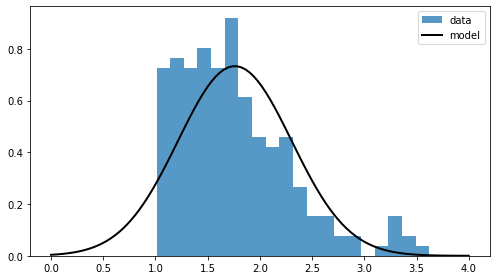

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True)
ax.hist(mistery_data, density=True, bins=20, label='data', alpha=0.75)
ax.plot(x_eval, p_eval, lw=2, c='k', label='model')
ax.legend();

La visualización revela que los datos tienen una distribución asimétrica (cola derecha más larga)

> Ajustar con un modelo normal no fue una buena decisión

Intentemos nuevamente el ajuste pero con distribuciones de cola derecha larga:

(1.790519835925755, 0.9907786403961358, 0.4295227907552)
(0.5432456929387437, 0.7550798666410953, 0.8711472938350178)
(1.5177983118106886, 0.4010033437891445)


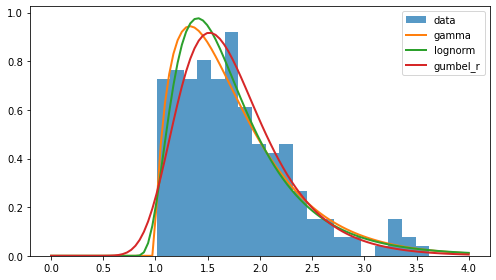

In [5]:
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True)
ax.hist(mistery_data, density=True, label='data', alpha=0.75, bins=20)

for dist in [scipy.stats.gamma, 
             scipy.stats.lognorm, 
             scipy.stats.gumbel_r]:
    mle_params = dist.fit(mistery_data)
    print(mle_params)
    ax.plot(x_eval, dist(*mle_params).pdf(x_eval), lw=2, label=dist.name)
    
ax.legend();

A simple vista, el resultado del ajuste es superior al caso normal

> ¿Cómo decidir cual modelo es superior?

Para eso profundizaremos en el segundo nivel de la estadística inferencial

## Verificación de modelos

Una vez que hemos ajustado un modelo es buena práctica verificar la calidad o bondad del ajuste. Esto se puede hacer gráficamente utilizando histogramas, gráficos probabilidad-probabilidad (pp plot) o [gráficos cuantil-cuantil](https://es.wikipedia.org/wiki/Gr%C3%A1fico_Q-Q) (qq plot)

:::{seealso}

Para crear qq-plots o pp-plots en Python sugiero la [librería statsmodels](https://www.statsmodels.org/dev/graphics.html)

:::

También es muy usual visualizar la CDF de nuestro modelo teórico contra la CDF empírica de los datos. Por ejemplo:

In [6]:
def ECDF(data):
    data = np.sort(data)
    n = len(data)
    def result(x):
        return np.searchsorted(data, x, side='right')/n
    return result

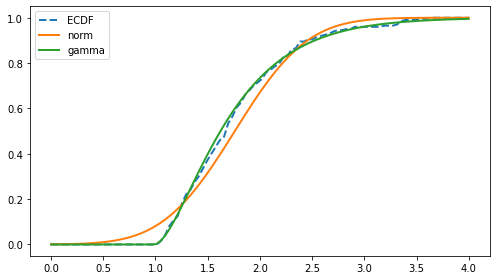

In [7]:
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True)

ax.plot(x_eval, ECDF(mistery_data)(x_eval), lw=2, ls='--', label='ECDF')

for dist in [scipy.stats.norm,
             scipy.stats.gamma]:
    mle_params = dist.fit(mistery_data)
    ax.plot(x_eval, dist(*mle_params).cdf(x_eval), lw=2, 
            label=dist.name, alpha=1.)
    
ax.legend();

Visualmente, el modelo gamma sigue más de cerca a la ECDF que el modelo normal

**Test de Kolmogorov-Smirnov**

Existen pruebas como el test de Kolmogorov-Smirnov (KS) y el test de Anderson-Darling (AS) que miden la diferencia entre la CDF empírica y teórica

En particular el test de KS se basa en el siguiente estadístico de prueba

$$
D_n = \sup_x |F_n(x) - F(x)|,
$$

es decir la distancia absoluta más grande entre $F_n(x)$, la CDF empírica, y $F(x)$, una CDF teórica de referencia

:::{warning}

El test de KS sólo se puede usar para distribuciones univariadas y continuas

:::

:::{note}

El test de KS puede usarse para comparar dos muestras o para comparar una muestra con una distribución teórica

:::

El test de KS de una muestra está implementado en [`scipy.stats.kstest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html). Los principales argumentos de esta función son

- un ndarray con las observaciones de nuestra muestra
- un método `cdf` de una distribución continua de scipy.stats

La función retorna un objeto cuyo atributo `statistic` es equivalente a $D_n$

A continuación se calcula el valor de $D_n$ para cuatro distribuciones teóricas contra la CDF empírica de `mistery_data`:

In [8]:
for dist in [scipy.stats.norm,
             scipy.stats.gamma, 
             scipy.stats.lognorm, 
             scipy.stats.gumbel_r]:
    
    mle_params = dist.fit(mistery_data)
    fitted_distribution = dist(*mle_params)
    result = scipy.stats.kstest(mistery_data, fitted_distribution.cdf)
    print(f"{dist.name:<10}: Dn = {result.statistic:0.4f}")
    

norm      : Dn = 0.0981
gamma     : Dn = 0.0538
lognorm   : Dn = 0.0525
gumbel_r  : Dn = 0.0493


La distribución de menor distancia es "gumbel_r", sin embargo 

> ¿Es significativa la diferencia en distancia que estamos observando?

Para responder esta pregunta podemos realizar un **test de hipótesis**. Este es el tema principal de la lección siguiente


:::{warning}

`scipy.stats.kstest` también retorna un p-value asociado a la hipótesis nula de que las distribuciones que se están comparando son iguales. Este p-value sólo es válido si la CDF teórica no fue ajustada con los datos de la CDF empírica, por lo tanto lo hemos ignorado en este ejemplo. 

:::

:::{seealso}

- Para calcular un p-value para el test de KS donde la distribución teórica fue ajustada utilizando MLE la opción es utilizar *bootstrap*. Lo veremos en una lección futura
- Para calcular el estadístico de Anderson-Darling (AD) sugiero la librería [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.anderson_statistic.html). AD es más sensible que KS cuando la diferencia está concentrada en las colas de la distribución
- Para variables discretas se puede usar el [test $\chi^2$](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html) de bondad de ajuste

:::

